## 1. Introduction
Let's learn some useful stuff about our features first:
ph: pH of 1. water (0 to 14).

Hardness: Capacity of water to precipitate soap in mg/L.

Solids: Total dissolved solids in ppm.

Chloramines: Amount of Chloramines in ppm.

Sulfate: Amount of Sulfates dissolved in mg/L.

Conductivity: Electrical conductivity of water in μS/cm.

Organic_carbon: Amount of organic carbon in ppm.

Trihalomethanes: Amount of Trihalomethanes in μg/L.

Turbidity: Measure of light emiting property of water in NTU.

Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

C:\Users\Zakir khan\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv(r'C:\Users\Zakir khan\Downloads\archive (1)\water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.isnull().sum(axis=0)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<AxesSubplot:>

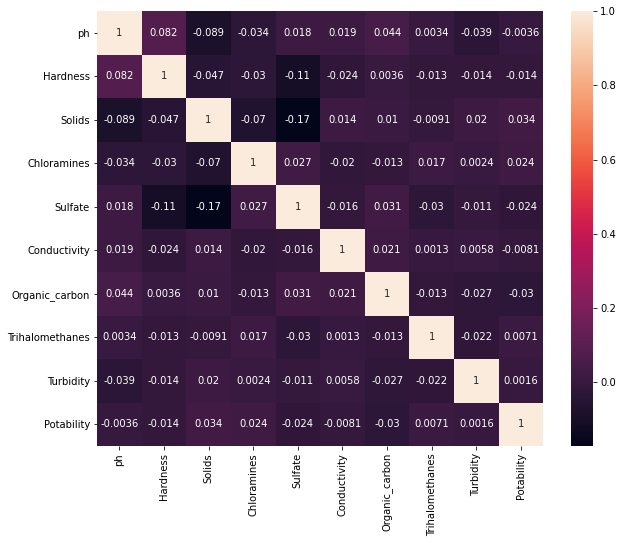

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

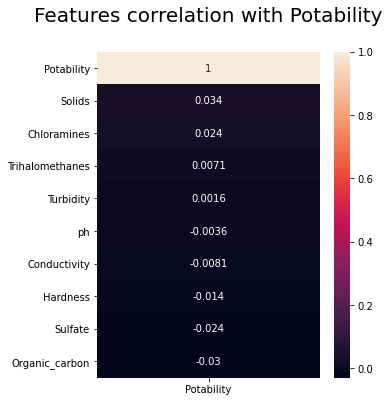

In [8]:
#Let's confirm the correlation between the target-"Potability" and each feature
heatmap=sns.heatmap(df.corr()[['Potability']].sort_values(by='Potability',ascending=False),annot=True) 
heatmap.set_title("Features correlation with Potability", fontdict = {'fontsize':20}, pad=30);
heatmap.figure.set_size_inches(5,6)

In [9]:
# treating missing value
df['ph'].fillna(value=df['ph'].mean(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].mean(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].mean(),inplace=True)

In [10]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:>

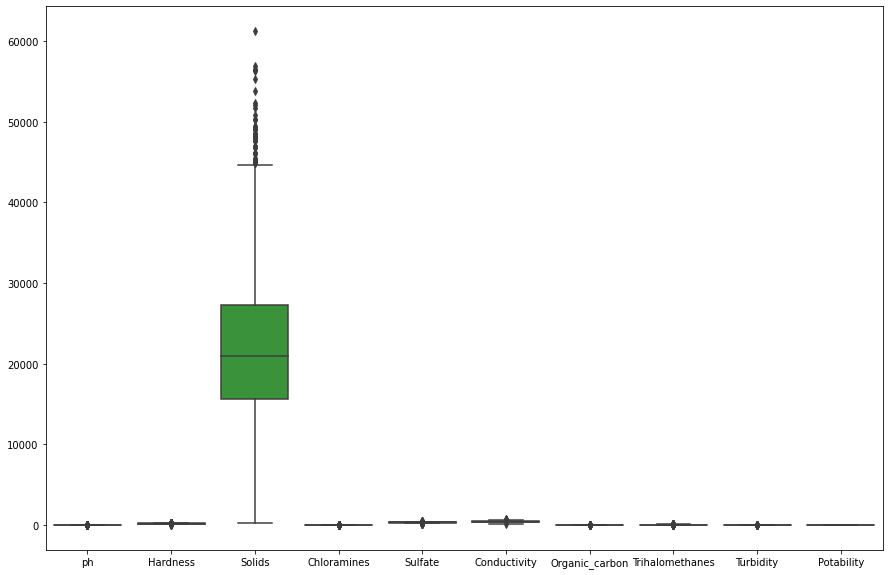

In [11]:
#checking outliers 
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

C:\Users\Zakir khan\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Potability', ylabel='count'>

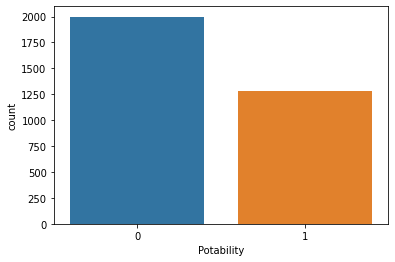

In [12]:
#Now let's do it step by step. First lets look at our label in order find out see if it's balanced or not
sns.countplot(df['Potability'])

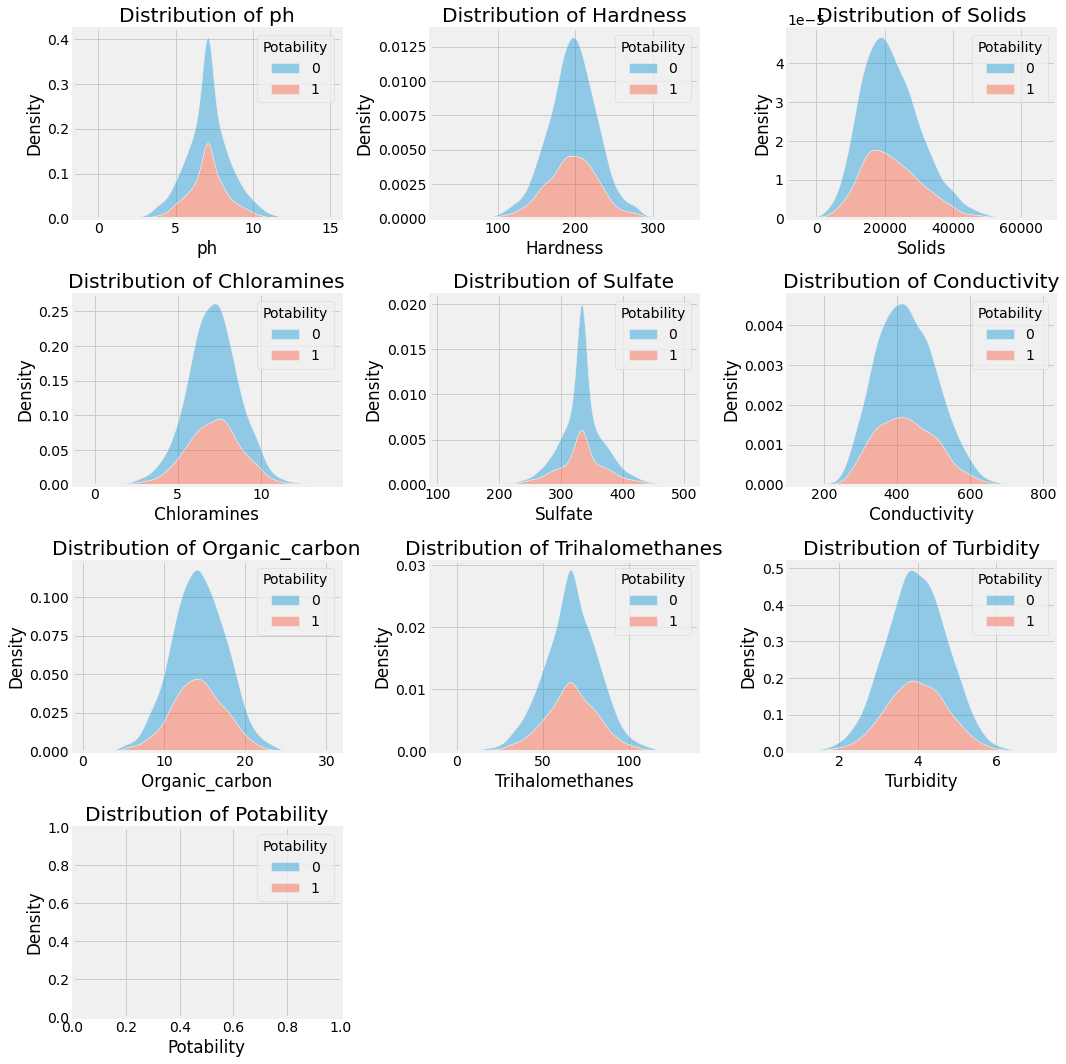

In [13]:
plt.figure(figsize=(15,15))
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
for ax,col in enumerate(df.columns):
    plt.subplot(4,3,ax+1)
    plt.title(f'Distribution of {col}')
    sns.kdeplot(x=df[col], fill=True, alpha=0.4, hue = df.Potability, multiple='stack')
plt.tight_layout()

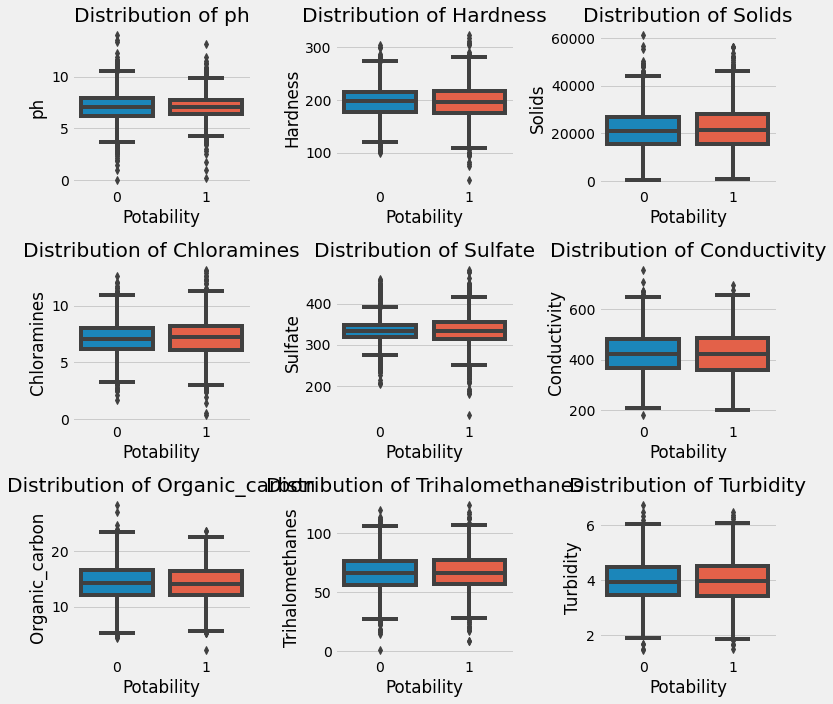

In [14]:
plt.figure(figsize=(11,10))

for ax,col in enumerate(df.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(f'Distribution of {col}')
    sns.boxplot(data=df, x='Potability',y=df[col])
    #plt.legend(prop=dict(size=10))
plt.tight_layout()


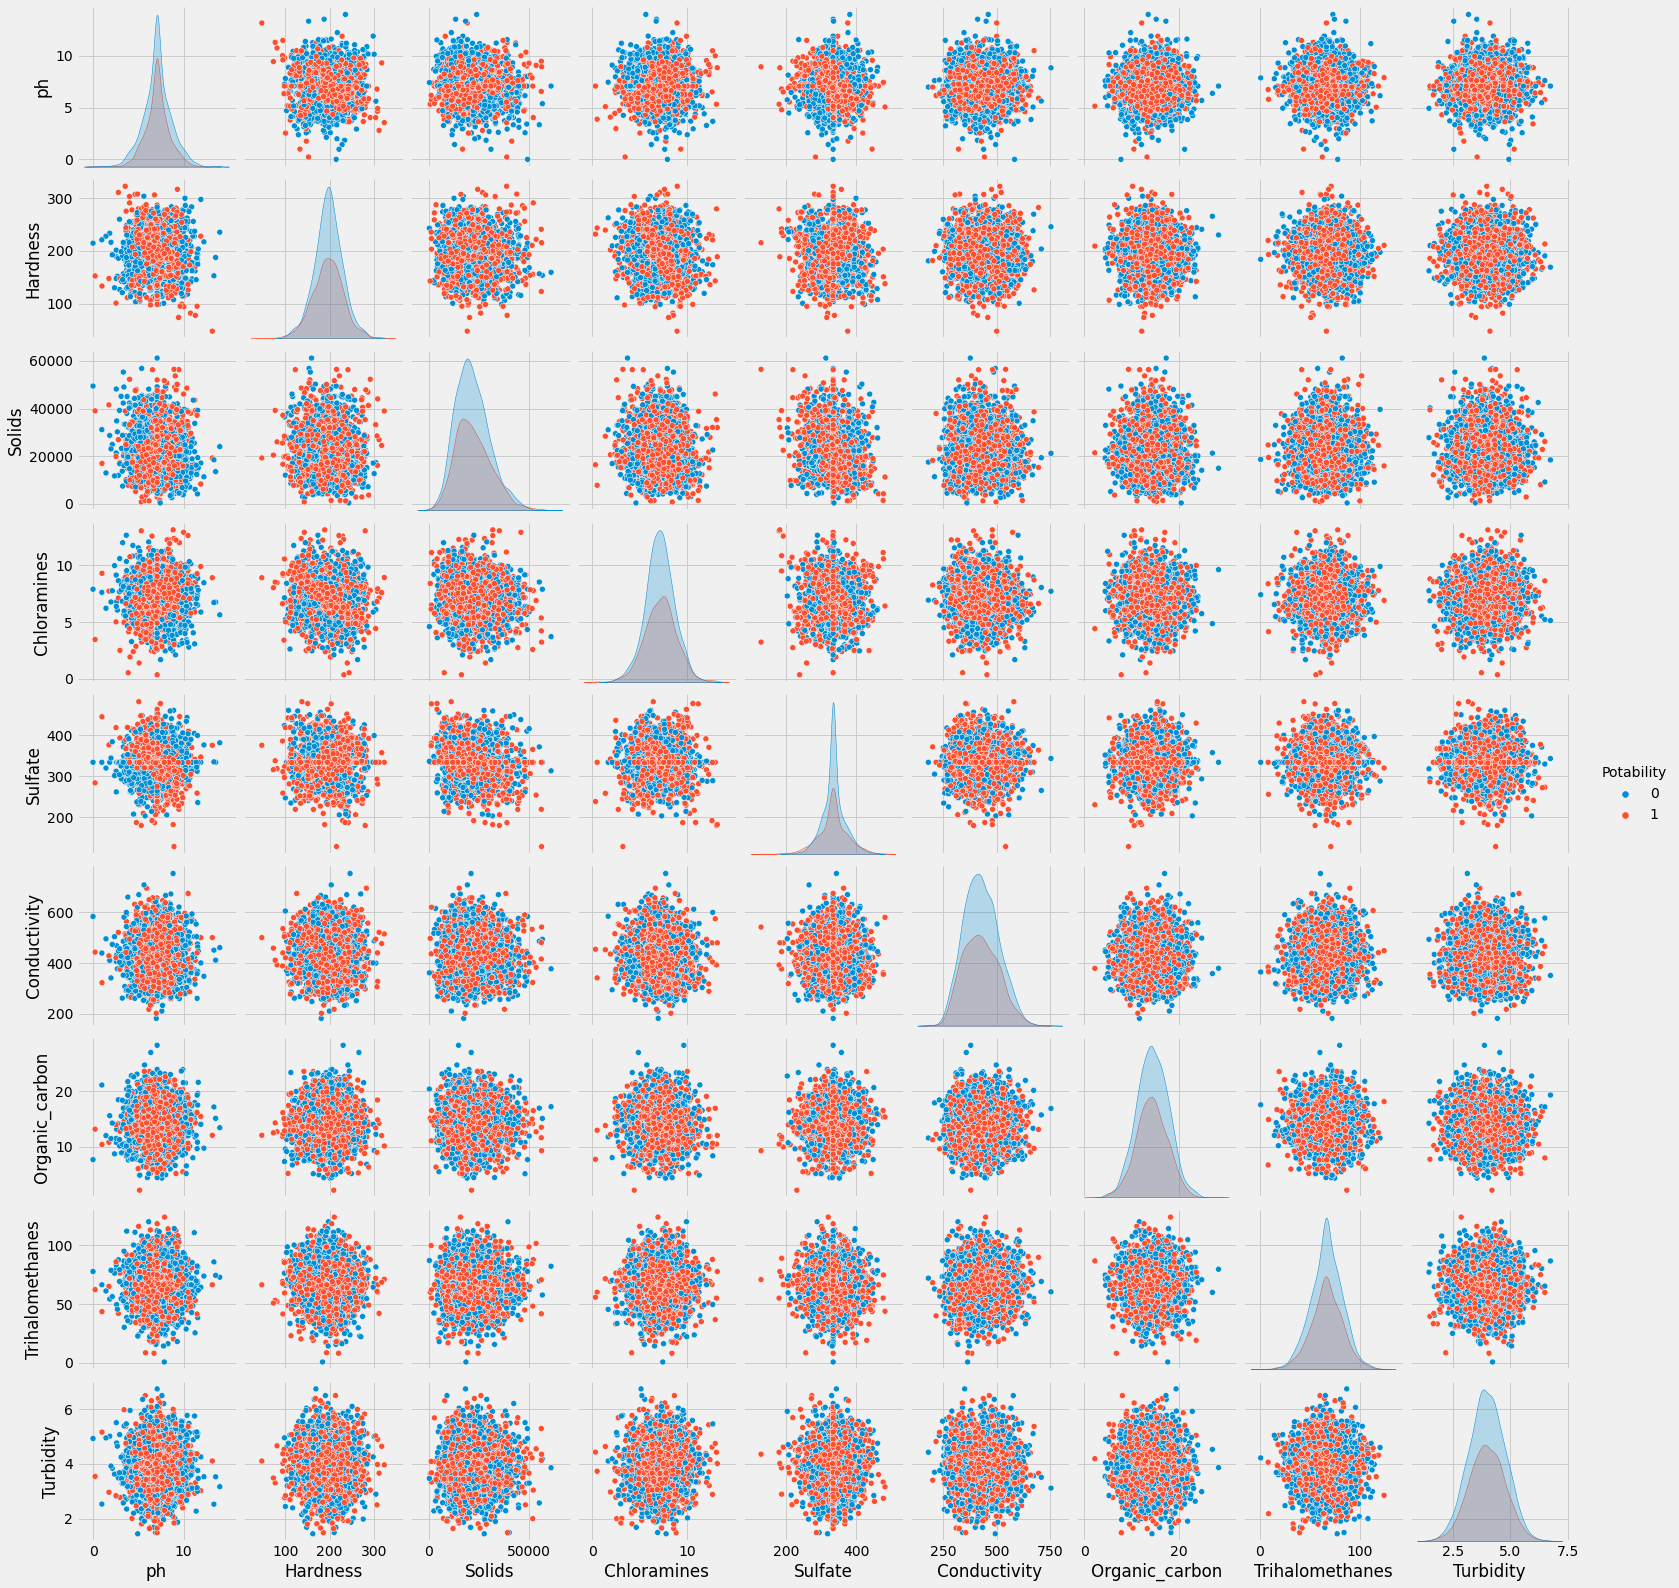

In [15]:
sns.pairplot(df, hue="Potability", height=2.5)

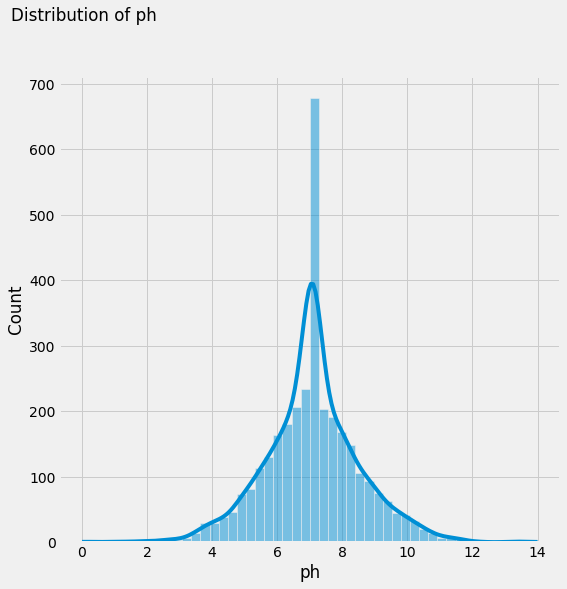

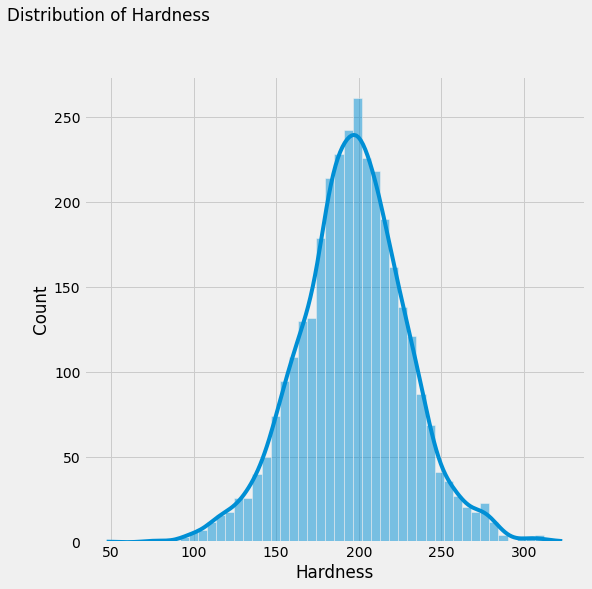

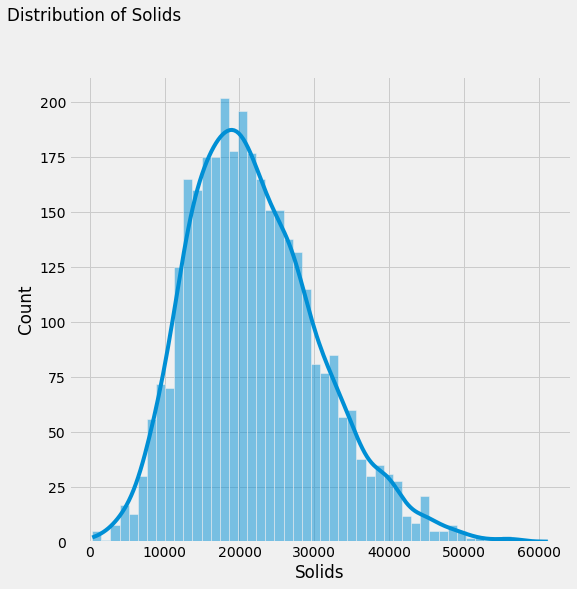

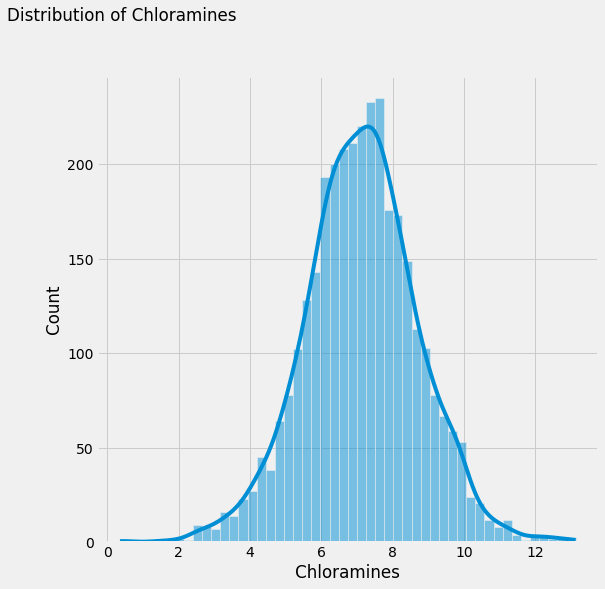

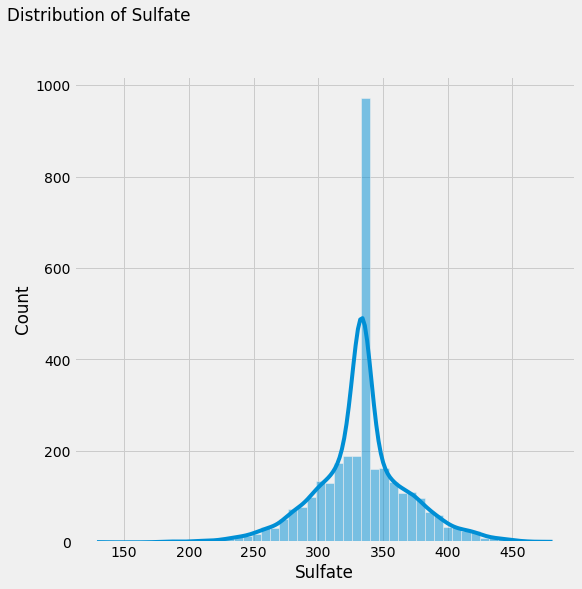

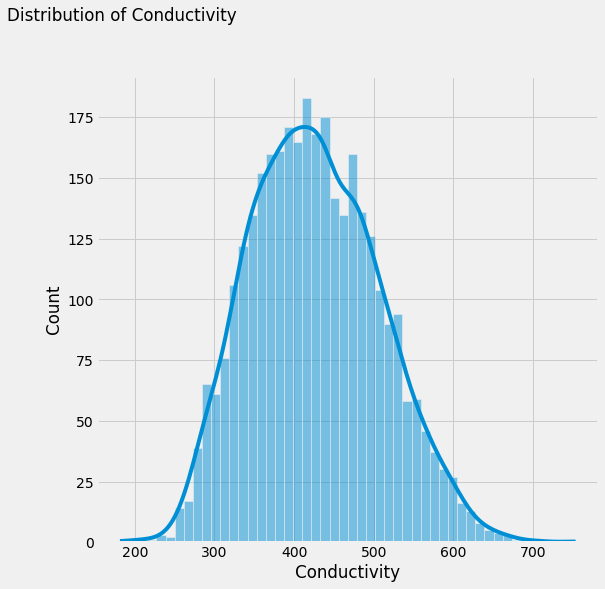

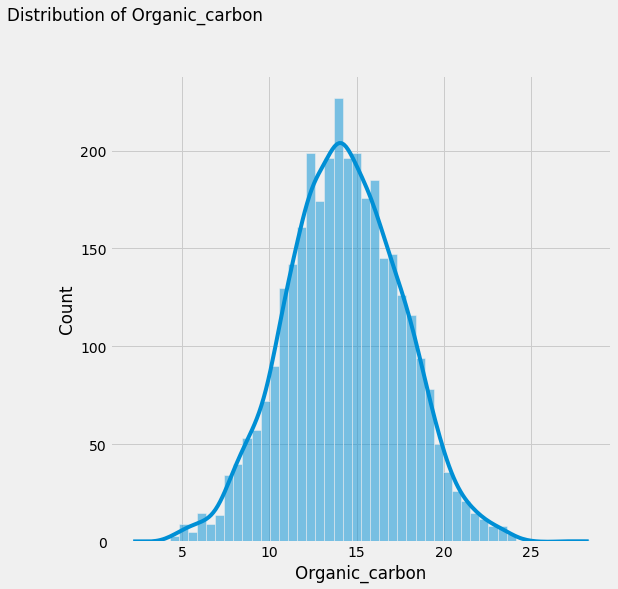

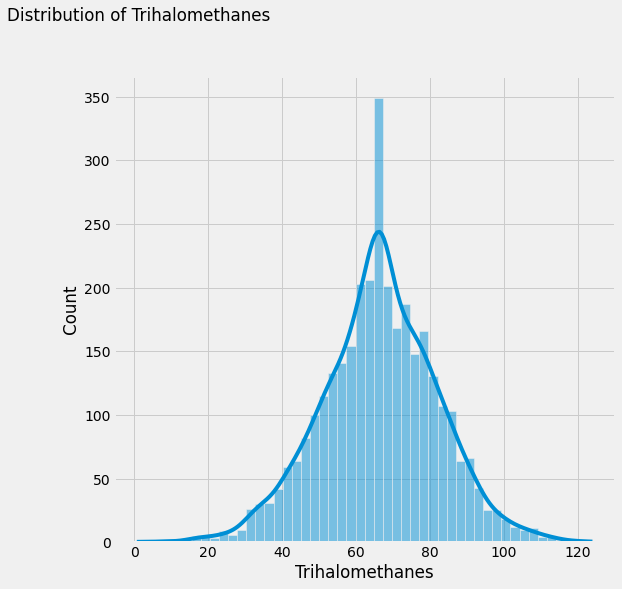

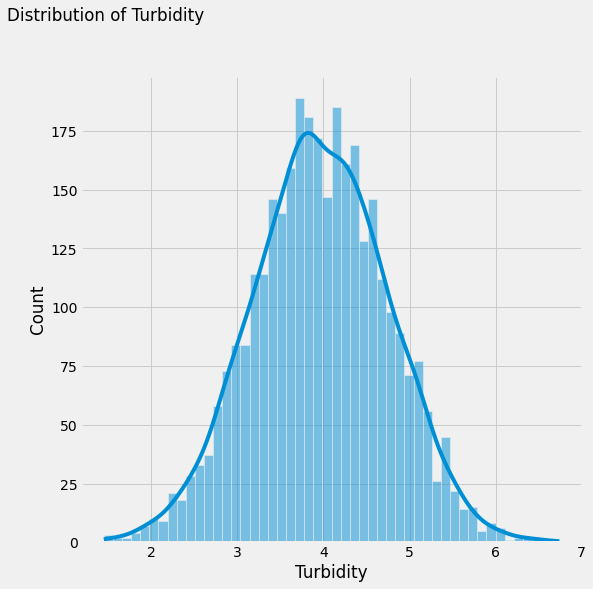

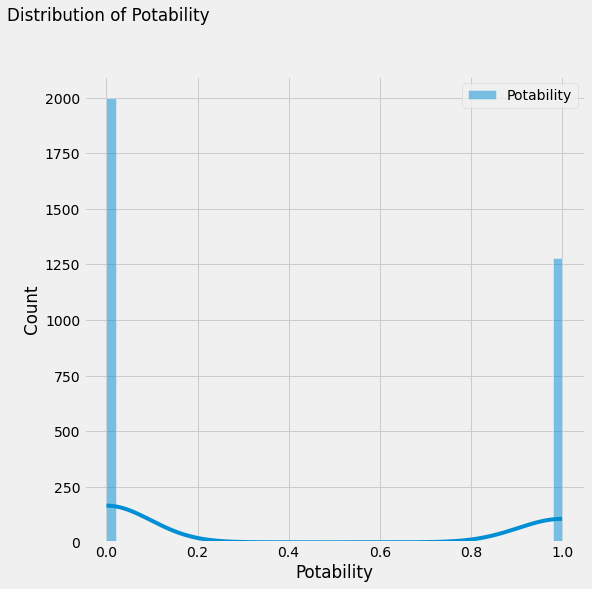

In [16]:
for col in df.columns:
    fig=plt.figure(figsize=(8,8))
    
    hist=sns.histplot(data=df[col],kde=True,label=col,bins=50)
    title=fig.suptitle('Distribution of '+ col ,x=0.123,y=1,)
plt.legend()
plt.show()

In [17]:
#train test split
X=df.drop('Potability',axis=1)
Y=df['Potability']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=0)

In [19]:
U
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
#X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_trainC, y_trainC)
sm = SMOTE(random_state=12, sampling_strategy=1.0)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [20]:
x_train_res.shape,y_train_res.shape
#y_train_res.shape

((3172, 9), (3172,))

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
X_train=scaler.fit_transform(x_train_res)
X_test=scaler.fit_transform(x_test)

In [23]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

svc=SVC()

ada = AdaBoostClassifier()

xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)


para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#Decision Tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#AdaBoost
params_ada = {'n_estimators': [50,100,250,400,500,600], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

#XGBoost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

param_svc={'C':[0.1,0.2,0.3,0.4,0.5],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
grid_svc= GridSearchCV(SVC,param_grid=param_svc,cv=5)

In [24]:
grid_knn.fit(X_train, y_train_res)
grid_dt.fit(X_train, y_train_res)
#grid_svc.fit(x_train, y_train)
grid_rf.fit(X_train, y_train_res)
grid_ada.fit(X_train, y_train_res)
rs_xgb.fit(X_train, y_train_res)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)
#print("Best parameters for SVC:", grid_svc.best_params_)

Best parameters for KNN: {'n_neighbors': 1}
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 2}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}
Best parameters for AdaBoost: {'learning_rate': 0.5, 'n_estimators': 100}
Best parameters for XGBoost: {'n_estimators': 800, 'learning_rate': 0.2}


In [29]:
models= [('KNeighborsClassifier',knn),('DecisionTreeClassifier',dt),('RandomForestClassifier',rf),('XGBClassifier',xgb),
         ('AdaBoostClassifier',ada)]

for model_name, model in models:
    model.fit(X_train,y_train_res)
    y_pred=model.predict(X_test)
    accy_score=accuracy_score(y_pred,y_test)
    print(' {:s} : {:2f}'.format(model_name, accy_score) )
    print(classification_report(y_test,y_pred))

 KNeighborsClassifier : 0.564024
              precision    recall  f1-score   support

           0       0.67      0.59      0.63       412
           1       0.43      0.52      0.47       244

    accuracy                           0.56       656
   macro avg       0.55      0.55      0.55       656
weighted avg       0.58      0.56      0.57       656

 DecisionTreeClassifier : 0.565549
              precision    recall  f1-score   support

           0       0.67      0.62      0.64       412
           1       0.43      0.48      0.45       244

    accuracy                           0.57       656
   macro avg       0.55      0.55      0.55       656
weighted avg       0.58      0.57      0.57       656

 RandomForestClassifier : 0.620427
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       412
           1       0.49      0.45      0.47       244

    accuracy                           0.62       656
   macro avg       0.59  